In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


#plotting the dataset

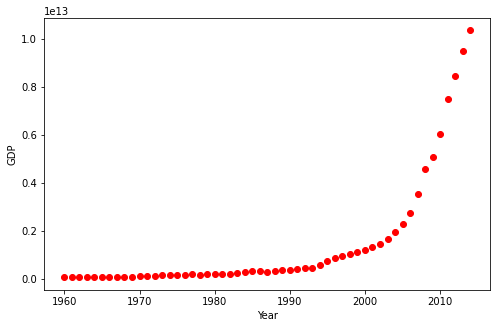

In [10]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [11]:
#It kind of looks like an either logistic or exponential function
#we determine that the logistic function could be a good approximation, 
#since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end

#choosing the model

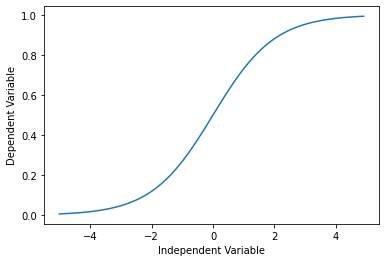

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y =  1.0 / (1.0 +np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#building model

In [13]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
#check eqn for logistic function , ull get y eqn 

In [14]:
#𝛽_1 : Controls the curve's steepness,

#𝛽_2 : Slides the curve on the x-axis

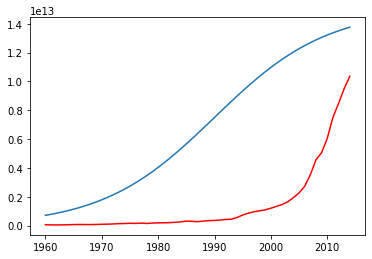

In [15]:
#initialize its parameters
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
#sigmoid line that might fit with the data
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, color='red')

In [16]:
#to find the best parameters for our model
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)


find the best parameters for our fit line:-



*  use curve_fit which uses non-linear least squares to fit our sigmoid function


*   Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized

*  popt are our optimized parameters





In [17]:
from scipy.optimize import curve_fit
#popt(array):-Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
## the estimated covariance of param in pcov
popt,pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453019, beta_2 = 0.997207


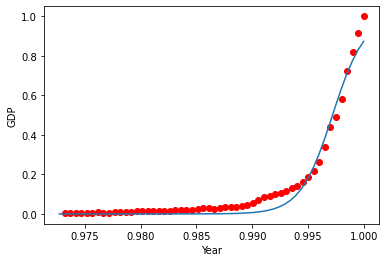

In [23]:
#plot our resulting regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro')
plt.plot(x,y)
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()